## Matrix and a group of Prediction function 

<img src="Matrix_and_Prediction_function.png" alt="A simple neural network" width="400"/>

$z$ is the prediction function

$X$ is the input matrix

$W$ is the weight matrix of the corresponding input matrix, $W^T$ is the trans matrix of $W$

$B$ is the bias matrix of the corresponding input matrix

Prediction function has a general form: $z = X \bullet W^T + B$

### 1D input

<img src="1D_input.png" alt="A simple neural network" width="400"/>

### 2D input

<img src="2D_input.png" alt="A simple neural network" width="400"/>

### 3D_input_with_multi-neuro

<img src="3D_input_multi_neuro.png" alt="A simple neural network" width="300"/>

And the equation will be:

<img src="3D_input_multi_neuro_eq.png" alt="A simple neural network" width="400"/>

## Tensor calculation

Using TensorFlow backend.
/Users/Collin/PycharmProjects/ML_Tutorial_Bilibili/Bilibili_Machine_Learning/第8课资料/lesson8/plot_utils.py:23: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


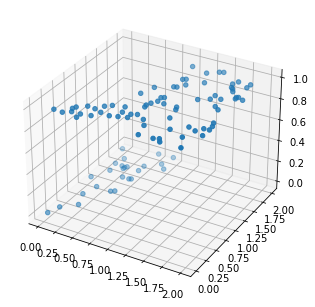

In [1]:
import numpy as np
import dataset
import plot_utils

# Generate the dataset
SAMPLE_SIZE = 100
X,Y = dataset.get_beans(SAMPLE_SIZE)
plot_utils.show_scatter(X, Y)

In [2]:
# 2 Inputs and 1 neuro node
W = np.array([0.1, 0.1])
B = np.array([0.1])

def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(X):
    # z = X * W^T + B
    Z = X.dot(W.T) + B
    # Activation function sigmoid
    A = sigmoid(Z)
    return A

## Do propagation in Tensor form (compare to previous manual form)

/Users/Collin/PycharmProjects/ML_Tutorial_Bilibili/Bilibili_Machine_Learning/第8课资料/lesson8/plot_utils.py:48: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


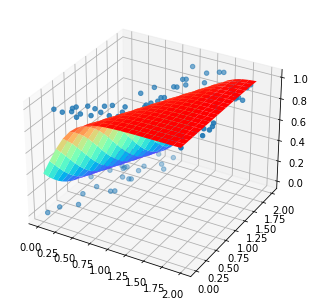

In [3]:
for _ in range(500):
    for i in range(SAMPLE_SIZE):
        X_i = X[i]           # Note that x is an array but not a single number
        Y_i = Y[i]

        # Forward propagation
        A = forward_propagation(X_i)

        # get the error
        E = (Y_i - A)**2

        # get the gradient for prediction function (in the matrix form)
        dEdA = -2 * (Y_i - A)
        dAdZ = A * (1 - A)
        dZdW = X_i
        dZdB = 1

        dEdW = dEdA * dAdZ * dZdW
        dEdB = dEdA * dAdZ * dZdB

        # Update the w1, w2, and b value to finish backward propagation
        alpha = 0.01
        W = W - alpha * dEdW
        B = B - alpha * dEdB

# Finally plot the curve
plot_utils.show_scatter_surface(X, Y, forward_propagation)

## How to build a model using Keras (e.g.)

### Sequential

<img src="Sequential.png" alt="A simple neural network" width="300"/>

### Dense

<img src="Dense.png" alt="A simple neural network" width="300"/>

Note: do not run the code in the next cell

In [ ]:
# Import keras
from keras.models import Sequential
from keras.layers import Dense

# Create a model
model = Sequential()

# Add 4 neuro node to hidden layer, employ sigmoid activation function, input dimension is 1
model.add(Dense(units=4, activation='sigmoid', input_dim=1))

# Add 1 neuro node to output layer, employ sigmoid activation function
model.add(Dense(units=1, activation='sigmoid'))

# Choose to use mean square error cost function and Stochastic gradient descent algorithm
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# Start training
model.fit(x_train, y_train, epochs=5, batch_size=32)

## Build a same bean model using keras

In [4]:
# Import keras
from keras.models import Sequential
from keras.layers import Dense

### 1D 2 class data input

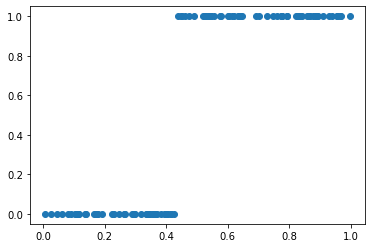

In [5]:
# Generate the dataset
SAMPLE_SIZE = 100
X,Y = dataset.get_beans1(SAMPLE_SIZE) # Get 1D 2 class data
plot_utils.show_scatter(X, Y)

Epoch 1/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.3700
Epoch 2/1000
100/100 [==============================] - 0s 159us/step - loss: 0.2517 - accuracy: 0.2600
Epoch 3/1000
100/100 [==============================] - 0s 145us/step - loss: 0.2513 - accuracy: 0.0900
Epoch 4/1000
100/100 [==============================] - 0s 146us/step - loss: 0.2508 - accuracy: 0.2400
Epoch 5/1000
100/100 [==============================] - 0s 137us/step - loss: 0.2503 - accuracy: 0.5500
Epoch 6/1000
100/100 [==============================] - 0s 167us/step - loss: 0.2498 - accuracy: 0.6100
Epoch 7/1000
100/100 [==============================] - 0s 202us/step - loss: 0.2494 - accuracy: 0.6100
Epoch 8/1000
100/100 [==============================] - 0s 157us/step - loss: 0.2489 - accuracy: 0.6100
Epoch 9/1000
100/100 [==============================] - 0s 167us/step - loss: 0.2485 - accuracy: 0.6100
Epoch 10/1000
100/100 [==============================] - 0s 163us/

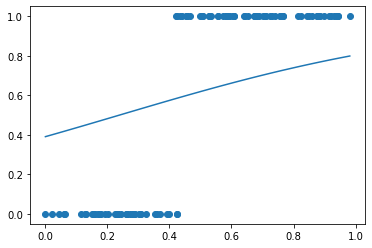

In [6]:
# Create a model
model = Sequential()

# Add 1 neuro node to hidden layer, employ sigmoid activation function, input dimension is 2
model.add(Dense(units=1, activation='sigmoid', input_dim=1))

# Choose to use mean square error cost function and Stochastic gradient descent algorithm
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# Start training
model.fit(X, Y, epochs=2000, batch_size=20)        # epochs: # of rounds of training, batch size: how many data point in each single training
# number of total training = (sample_size / batch_size) * epochs

predict = model.predict(X)

plot_utils.show_scatter_curve(X, Y, predict)

### 1D 3 class input data

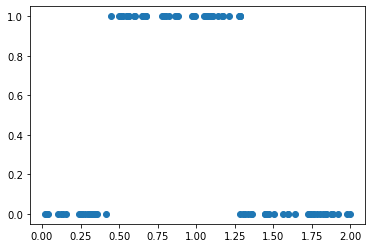

In [9]:
# Generate the dataset
SAMPLE_SIZE = 100
X,Y = dataset.get_beans2(SAMPLE_SIZE) # Get 1D 3 class data
plot_utils.show_scatter(X, Y)

Epoch 1/1000
100/100 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.4800
Epoch 2/1000
100/100 [==============================] - 0s 119us/step - loss: 0.2810 - accuracy: 0.4900
Epoch 3/1000
100/100 [==============================] - 0s 128us/step - loss: 0.2804 - accuracy: 0.4900
Epoch 4/1000
100/100 [==============================] - 0s 143us/step - loss: 0.2798 - accuracy: 0.4900
Epoch 5/1000
100/100 [==============================] - 0s 155us/step - loss: 0.2792 - accuracy: 0.4900
Epoch 6/1000
100/100 [==============================] - 0s 235us/step - loss: 0.2786 - accuracy: 0.4900
Epoch 7/1000
100/100 [==============================] - 0s 295us/step - loss: 0.2780 - accuracy: 0.4900
Epoch 8/1000
100/100 [==============================] - 0s 256us/step - loss: 0.2775 - accuracy: 0.4900
Epoch 9/1000
100/100 [==============================] - 0s 228us/step - loss: 0.2769 - accuracy: 0.4900
Epoch 10/1000
100/100 [==============================] - 0s 180us/

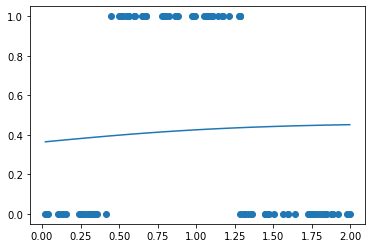

In [10]:
# Create a model
model = Sequential()

# Add 2 neuro node to hidden layer, employ sigmoid activation function, input dimension is 1
model.add(Dense(units=2, activation='sigmoid', input_dim=1))
model.add(Dense(units=1, activation='sigmoid'))

# Choose to use mean square error cost function and Stochastic gradient descent algorithm
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# Start training
model.fit(X, Y, epochs=1000, batch_size=20)        # epochs: # of rounds of training, batch size: how many data point in each single training
# number of total training = (sample_size / batch_size) * epochs

predict = model.predict(X)

plot_utils.show_scatter_curve(X, Y, predict)

The above learning outcome is not very good, need to adjust **alpha** (default alpha=0.01)

Increase alpha to 0.05, it becomes much better

Epoch 1/5000
100/100 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.6000
Epoch 2/5000
100/100 [==============================] - 0s 169us/step - loss: 0.2514 - accuracy: 0.6600
Epoch 3/5000
100/100 [==============================] - 0s 207us/step - loss: 0.2503 - accuracy: 0.5300
Epoch 4/5000
100/100 [==============================] - 0s 249us/step - loss: 0.2493 - accuracy: 0.4800
Epoch 5/5000
100/100 [==============================] - 0s 289us/step - loss: 0.2485 - accuracy: 0.3400
Epoch 6/5000
100/100 [==============================] - 0s 283us/step - loss: 0.2479 - accuracy: 0.3700
Epoch 7/5000
100/100 [==============================] - 0s 318us/step - loss: 0.2474 - accuracy: 0.5100
Epoch 8/5000
100/100 [==============================] - 0s 272us/step - loss: 0.2467 - accuracy: 0.5600
Epoch 9/5000
100/100 [==============================] - 0s 275us/step - loss: 0.2463 - accuracy: 0.5800
Epoch 10/5000
100/100 [==============================] - 0s 268us/

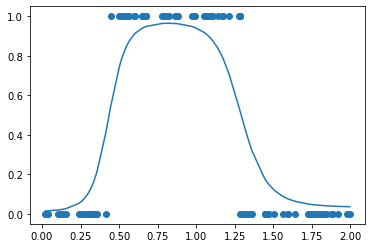

In [13]:
from keras.optimizers import SGD
# Create a model
model = Sequential()

# Add 2 neuro node to hidden layer, employ sigmoid activation function, input dimension is 2
model.add(Dense(units=2, activation='sigmoid', input_dim=1))
model.add(Dense(units=1, activation='sigmoid'))

# Choose to use mean square error cost function and Stochastic gradient descent algorithm
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.05), metrics=['accuracy'])

# Start training
model.fit(X, Y, epochs=5000, batch_size=10)        # epochs: # of rounds of training, batch size: how many data point in each single training
# number of total training = (sample_size / batch_size) * epochs

predict = model.predict(X)

plot_utils.show_scatter_curve(X, Y, predict)